In [1]:
!pip install six

In [2]:
!git clone https://github.com/s7s/machine_learning_1.git
%cd  machine_learning_1/decision_trees

fatal: destination path 'machine_learning_1' already exists and is not an empty directory.
/content/machine_learning_1/decision_trees


# **Import needed packages**

In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import utils

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, classification_report
import random
random.seed(0)

# **Read Data**

In [4]:
data = pd.read_csv('/content/Admission_Predict.csv')

In [5]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [7]:
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


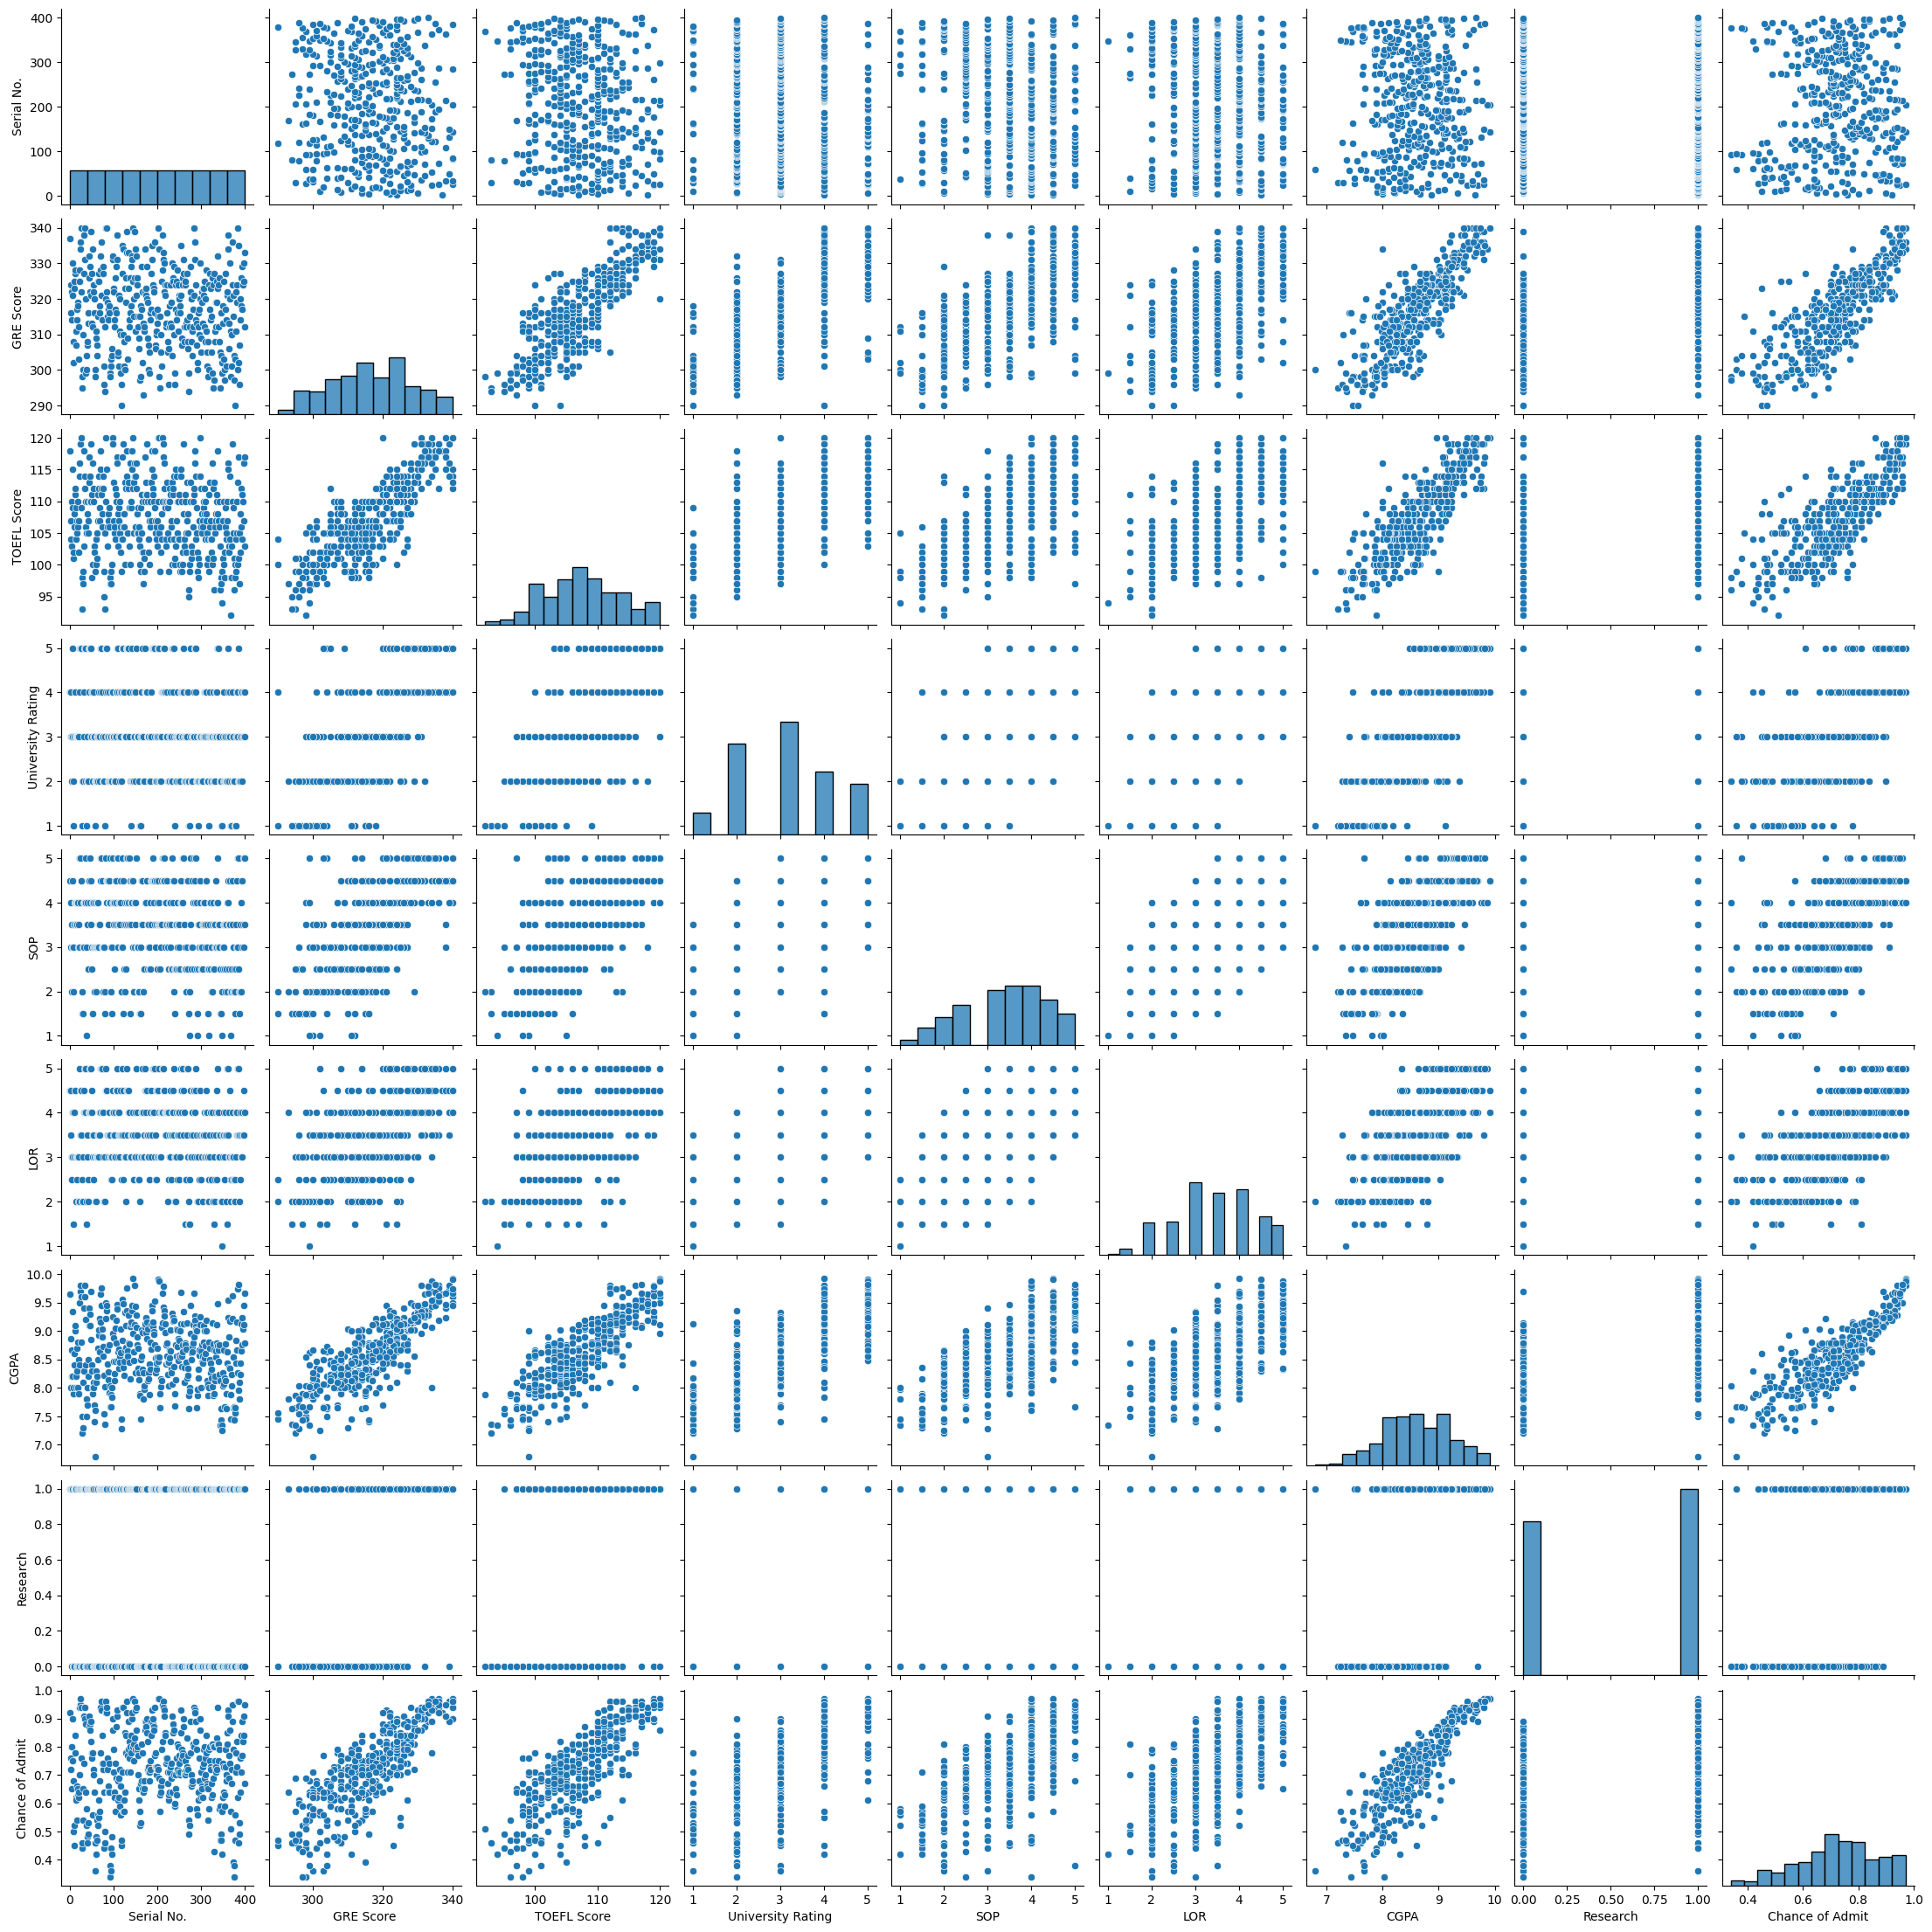

In [8]:
sns.pairplot(data)

<Axes: >

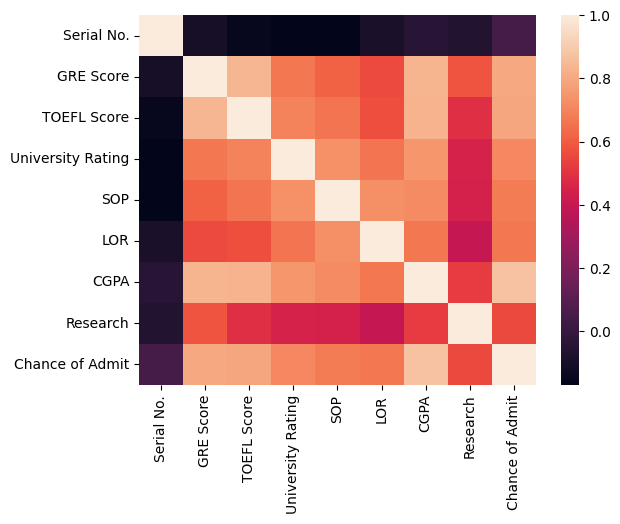

In [9]:
matrix = data.corr()
sns.heatmap(matrix)

# **Data Cleaning**

In [10]:
data.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [11]:
data['admit'] = data['Chance of Admit'].apply(lambda x: 1 if x >= 0.5 else 0)
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92,1
1,2,324,107,4,4.0,4.5,8.87,1,0.76,1
2,3,316,104,3,3.0,3.5,8.00,1,0.72,1
3,4,322,110,3,3.5,2.5,8.67,1,0.80,1
4,5,314,103,2,2.0,3.0,8.21,0,0.65,1


In [12]:
data = data.drop(columns=['Chance of Admit', 'Serial No.'])
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,admit
0,337,118,4,4.5,4.5,9.65,1,1
1,324,107,4,4.0,4.5,8.87,1,1
2,316,104,3,3.0,3.5,8.00,1,1
3,322,110,3,3.5,2.5,8.67,1,1
4,314,103,2,2.0,3.0,8.21,0,1


In [13]:
data.dtypes

GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
admit                  int64
dtype: object

In [14]:
features = data.drop(columns=['admit'])
labels = data['admit']

# **Splitting data into training and testing**

In [15]:
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.4, random_state=100)

# **Use Decision Tree for modelling**

In [16]:
dt_model = DecisionTreeClassifier().fit(x_train, y_train)

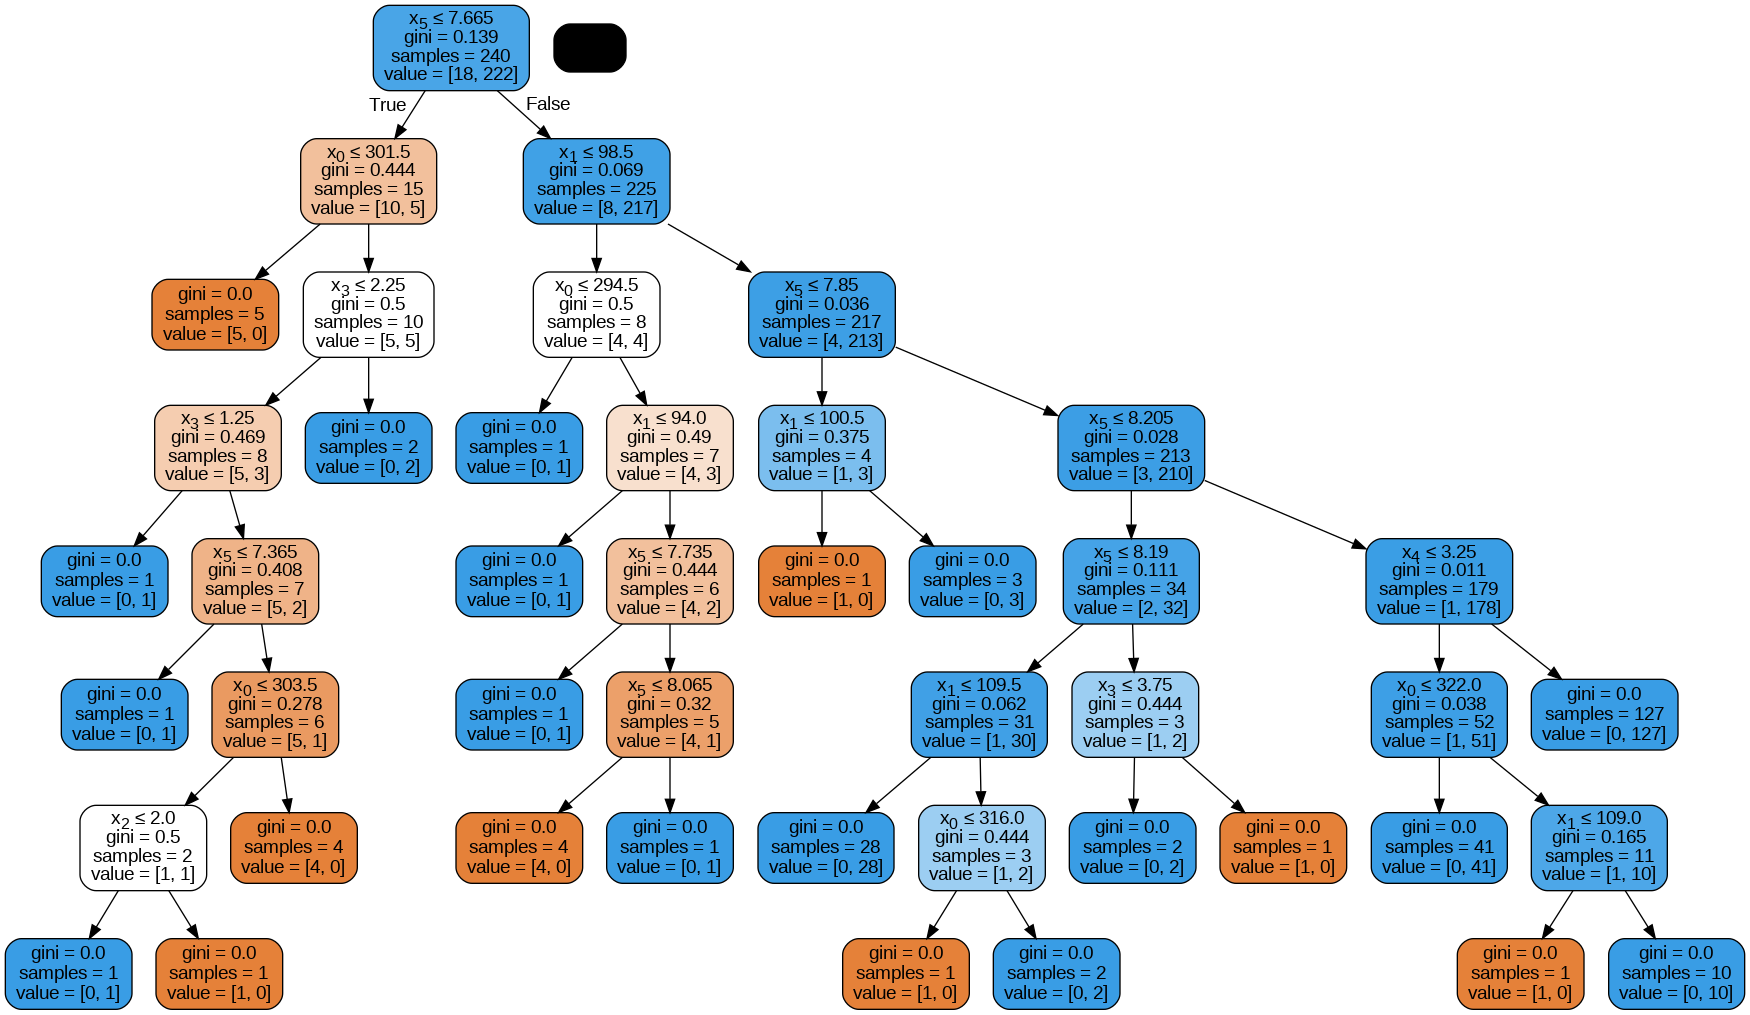

In [17]:
utils.display_tree(dt_model)

In [18]:
predicted = dt_model.predict(x_test)

In [19]:
print('the accuracy for training data: ', dt_model.score(x_train, y_train)*100)
print('the accuracy for testing data: ', dt_model.score(x_test, y_test)*100)

the accuracy for training data:  100.0
the accuracy for testing data:  93.125


# **Use DT with depth=3**

In [22]:
dtt_model = DecisionTreeClassifier(max_depth=3, min_samples_split=10, min_samples_leaf=10).fit(x_train, y_train)
dtt_model.score(features, labels)

0.94

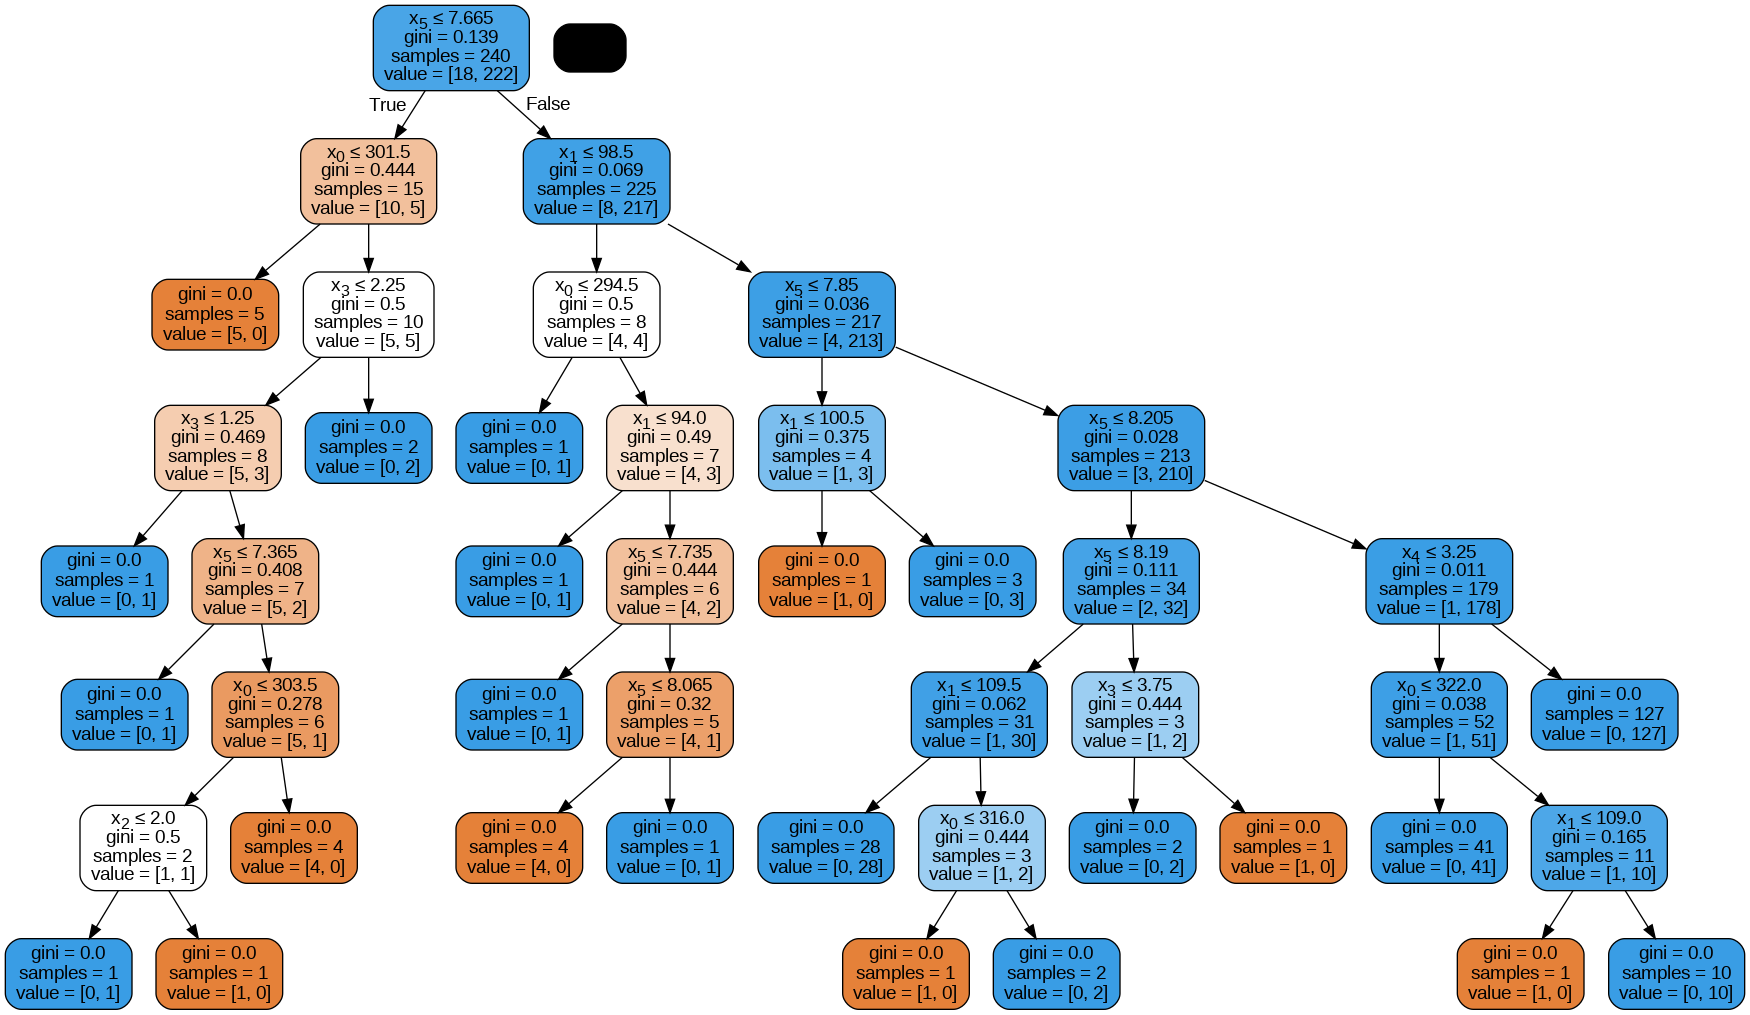

In [23]:
utils.display_tree(dt_model)

# **Evaluate model using confusion matrix and classification report**

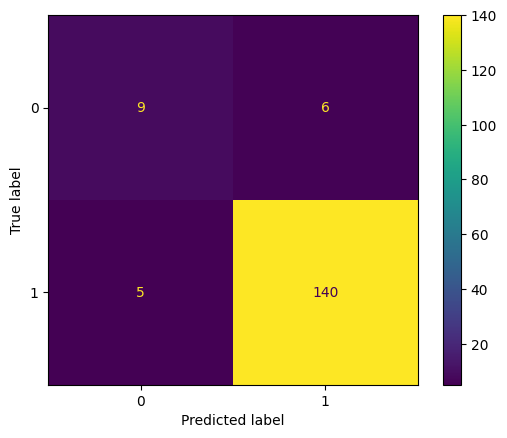

In [24]:
cm = confusion_matrix(y_test, predicted)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dt_model.classes_)
disp.plot()

In [25]:
print(classification_report(predicted, y_test))

              precision    recall  f1-score   support

           0       0.60      0.64      0.62        14
           1       0.97      0.96      0.96       146

    accuracy                           0.93       160
   macro avg       0.78      0.80      0.79       160
weighted avg       0.93      0.93      0.93       160



In [26]:
dtt_model.predict(x_test[:1])

array([1])

In [27]:
exams = data[['GRE Score', 'TOEFL Score']]
exams

,GRE Score,TOEFL Score
0,337,118
1,324,107
2,316,104
3,322,110
4,314,103
...,...,...
395,324,110
396,325,107
397,330,116
398,312,103


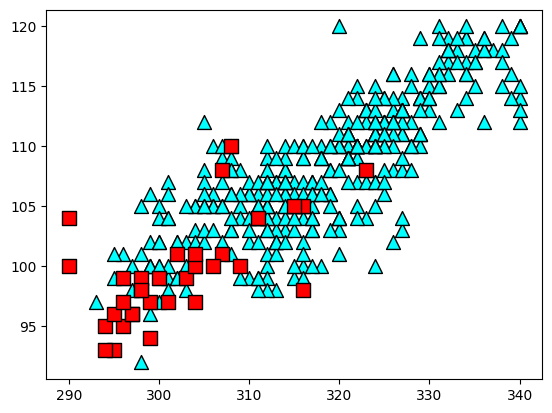

In [28]:
utils.plot_points(exams, labels)

# **Use DT with depth=2 for exams features**

In [29]:
dt_exams = DecisionTreeClassifier(max_depth=2).fit(exams, labels)
dt_exams.score(exams, labels)

0.94

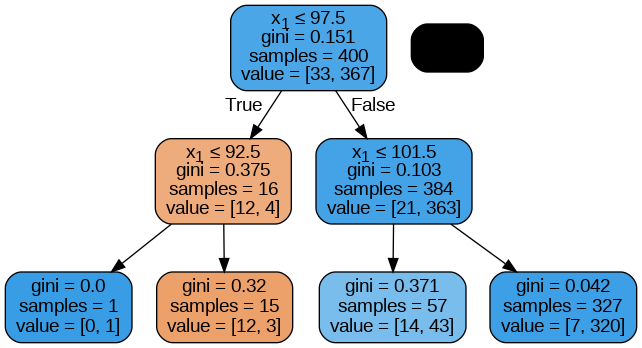

In [30]:
utils.display_tree(dt_exams)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


[[1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 ...
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]]


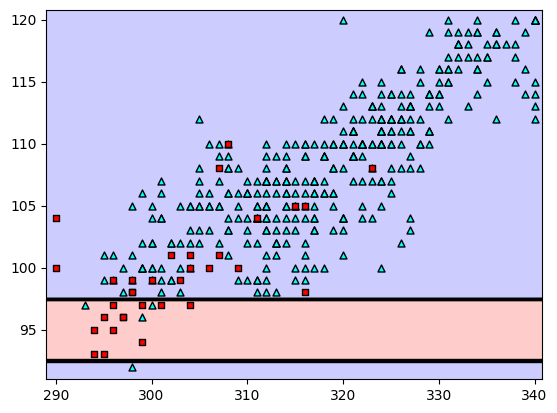

In [31]:
utils.plot_model(exams, labels, dt_exams, size_of_points=25)

# **Use DT with depth=1 for exams features**

In [32]:
dt_exams = DecisionTreeClassifier(max_depth=1).fit(exams, labels)
dt_exams.score(exams, labels)

0.9375

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]]


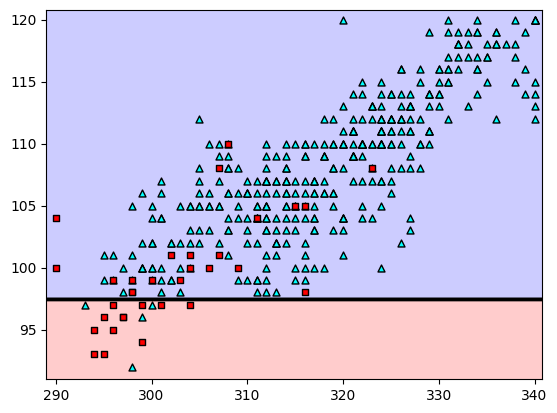

In [33]:
utils.plot_model(exams, labels, dt_exams, size_of_points=25)

# **Fitting a tree of unbounded depth(overfitting)**


In [34]:
dt_exams = DecisionTreeClassifier().fit(exams, labels)
dt_exams.score(exams, labels)

0.9775

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


[[1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 ...
 [0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]]


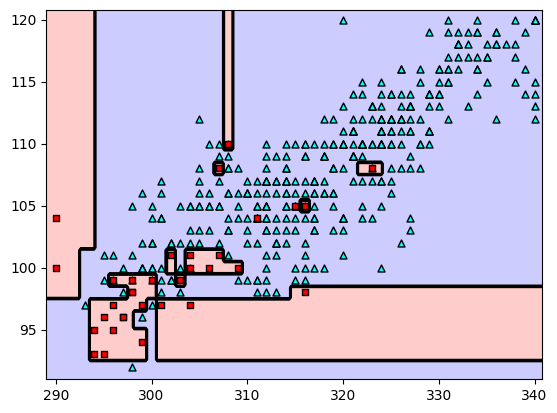

In [35]:
utils.plot_model(exams, labels, dt_exams, size_of_points=25)

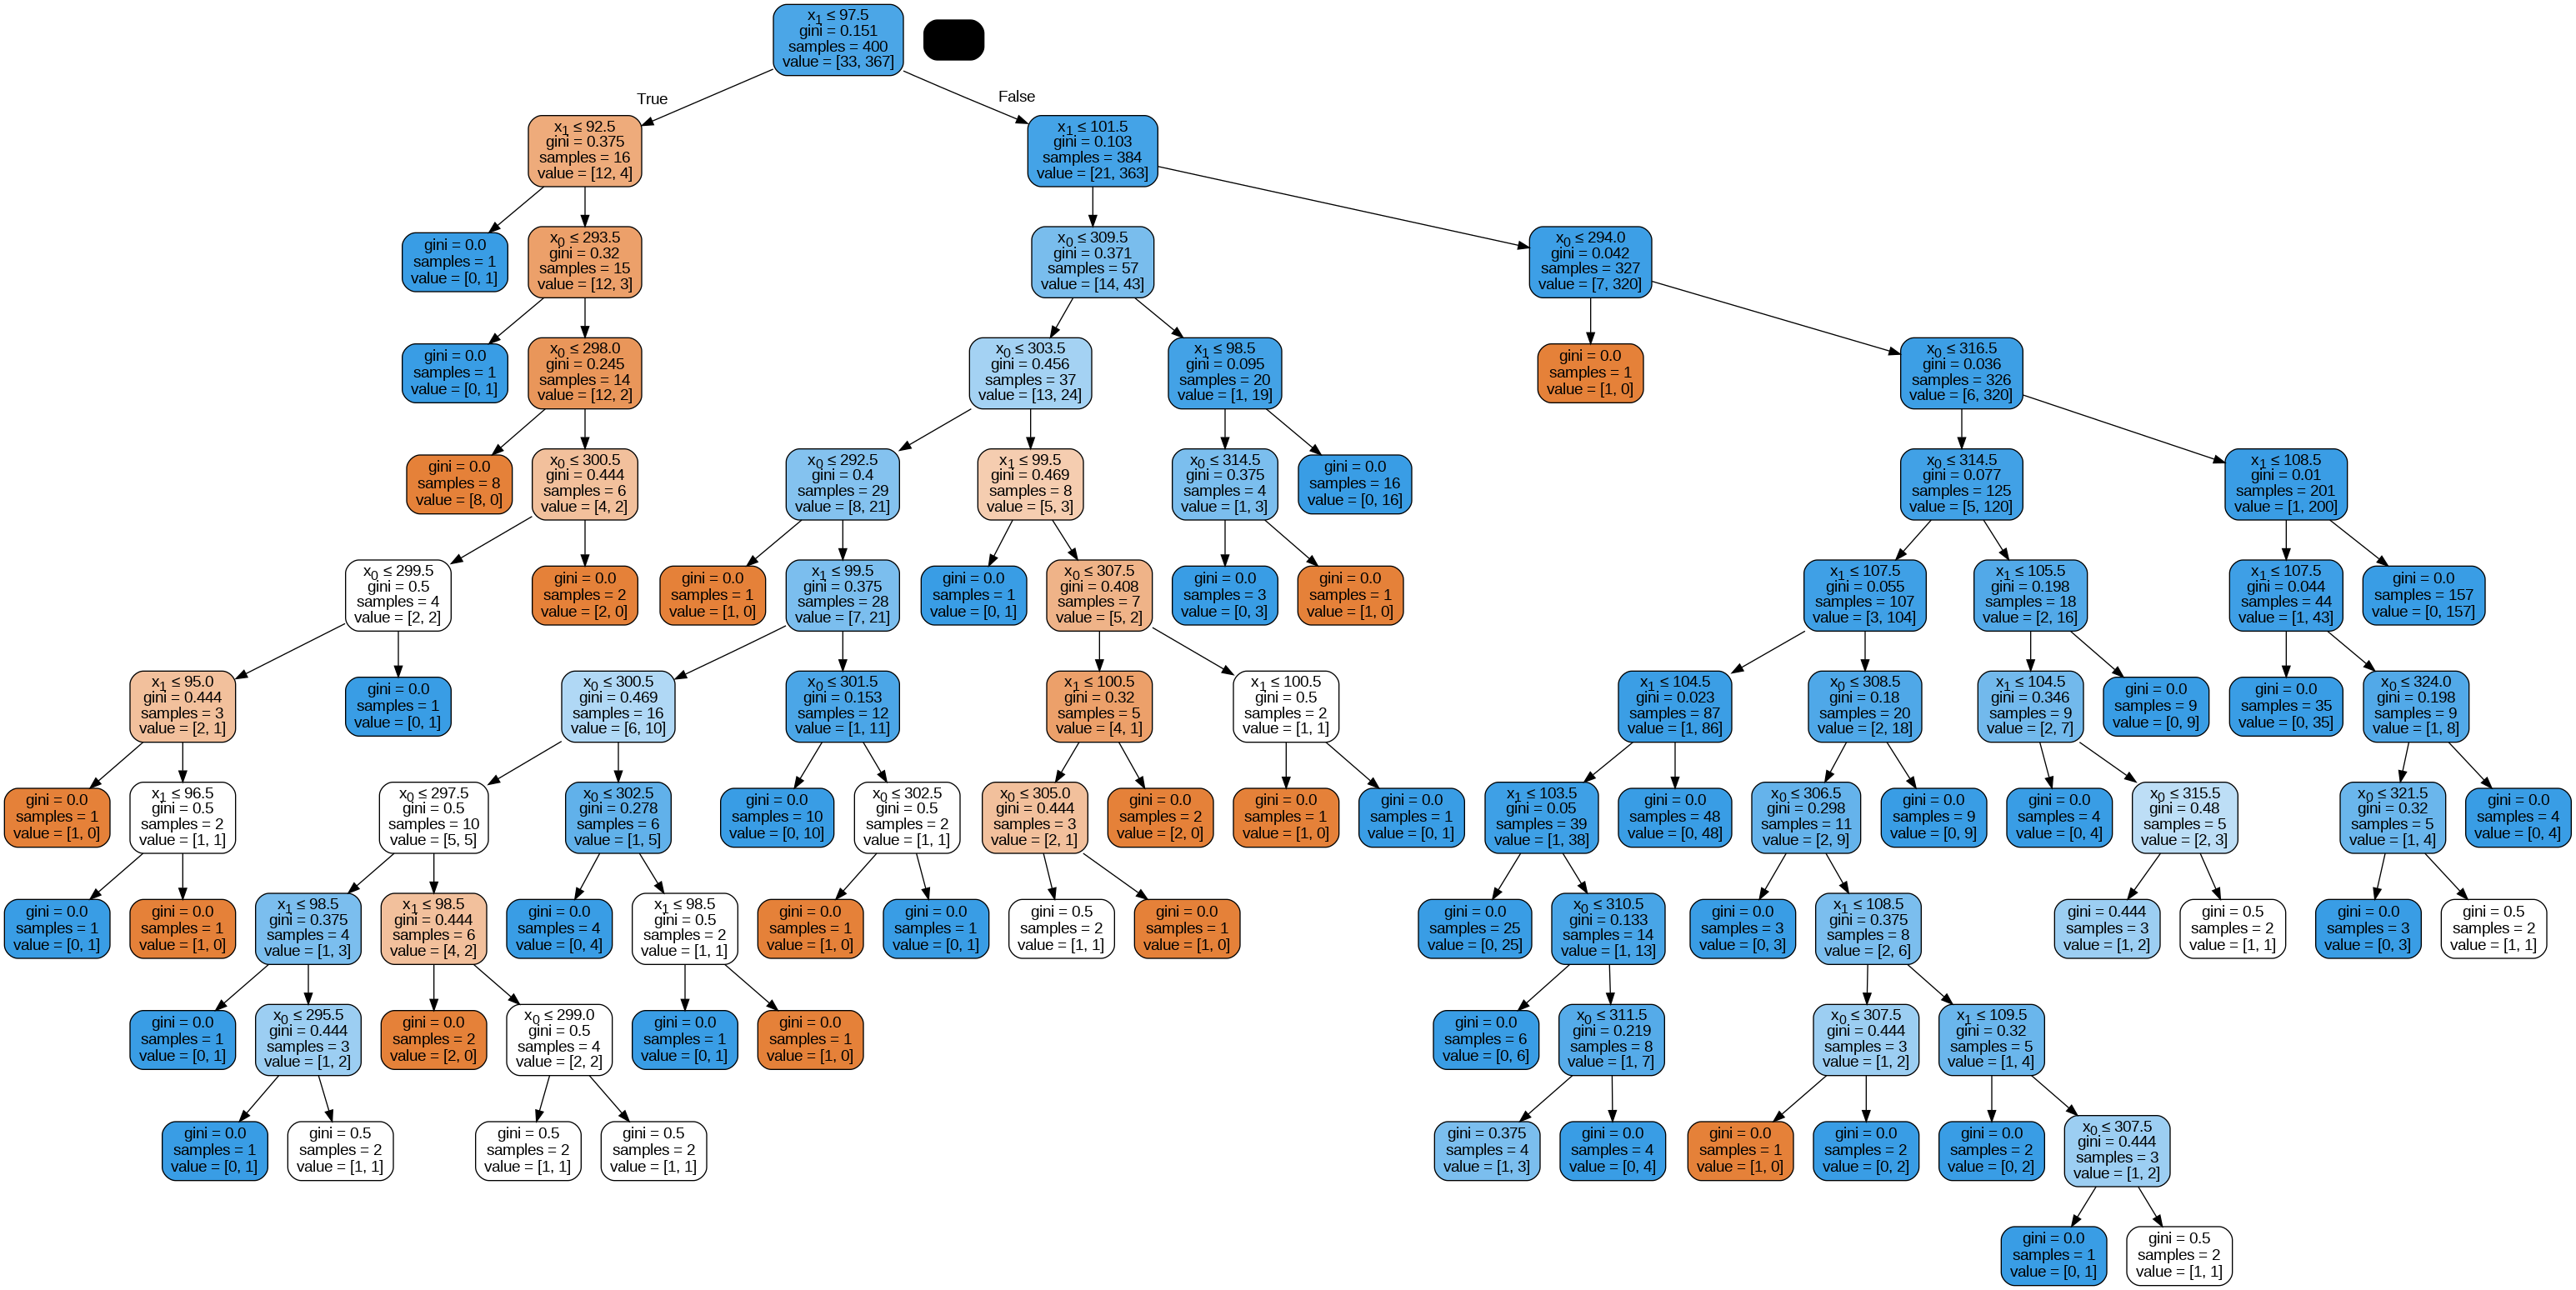

In [36]:
utils.display_tree(dt_exams)